# DATASET 3 MODEL TRAINING

### 1st revision on model parameters

### 50:50 dataset

## Import Library

In [1]:
# Fix random seeds for Reproducibility

from numpy.random import seed
seed(1)

import tensorflow as tf
tf.random.set_seed(2)

In [2]:
import os
os.environ["TF_DETERMINISTIC_OPS"] = "1"

In [5]:
# data
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#evaluation, analyzing results
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#demonstration of calculating metrics for a neural network model using sklearn
import tensorflow.keras as k

#train neural network
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.compat.v1.disable_resource_variables()
print(tf.__version__)

import time
from datetime import datetime


2.11.0


## Importing the dataset

In [7]:

dataset = pd.read_csv("/home/jovyan/Datasets/Dataset2/FINAL-traindata.csv")



In [5]:
dataset

,domain,ip_present,at_present,url_length,url_depth,redirection,https_domain,short_url,prefix/suffix,dns_record,web_traffic,domain_age,domain_end,dot_count,specialchar_count,subdom_count,label
0,NaN,0,0,1,3,0,0,0,0,0,0,1,1,0,2,0,0
1,NaN,0,0,1,4,0,0,0,0,0,0,1,1,0,4,0,0
2,NaN,0,0,0,2,0,0,0,0,0,1,1,1,0,7,0,0
3,NaN,0,0,1,4,0,0,0,0,0,1,1,1,0,3,0,0
4,NaN,0,0,0,2,0,0,0,0,0,1,1,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20323,gkjx168.com,0,0,0,1,0,0,0,0,0,1,0,1,0,4,0,1
20324,habbocreditosparati.blogspot.com,0,0,0,0,0,0,1,0,1,1,1,1,1,4,1,1
20325,creditiperhabbogratissicuro100.blogspot.com,0,0,1,3,0,0,1,0,1,1,1,1,1,6,1,1
20326,mundovirtualhabbo.blogspot.com,0,0,1,1,0,0,1,0,1,1,1,1,1,7,1,1


In [6]:
dataset_1 = dataset.drop('domain', axis = 1)

In [7]:
dataset_1

,ip_present,at_present,url_length,url_depth,redirection,https_domain,short_url,prefix/suffix,dns_record,web_traffic,domain_age,domain_end,dot_count,specialchar_count,subdom_count,label
0,0,0,1,3,0,0,0,0,0,0,1,1,0,2,0,0
1,0,0,1,4,0,0,0,0,0,0,1,1,0,4,0,0
2,0,0,0,2,0,0,0,0,0,1,1,1,0,7,0,0
3,0,0,1,4,0,0,0,0,0,1,1,1,0,3,0,0
4,0,0,0,2,0,0,0,0,0,1,1,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20323,0,0,0,1,0,0,0,0,0,1,0,1,0,4,0,1
20324,0,0,0,0,0,0,1,0,1,1,1,1,1,4,1,1
20325,0,0,1,3,0,0,1,0,1,1,1,1,1,6,1,1
20326,0,0,1,1,0,0,1,0,1,1,1,1,1,7,1,1


c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    10164
1    10164
Name: label, dtype: int64

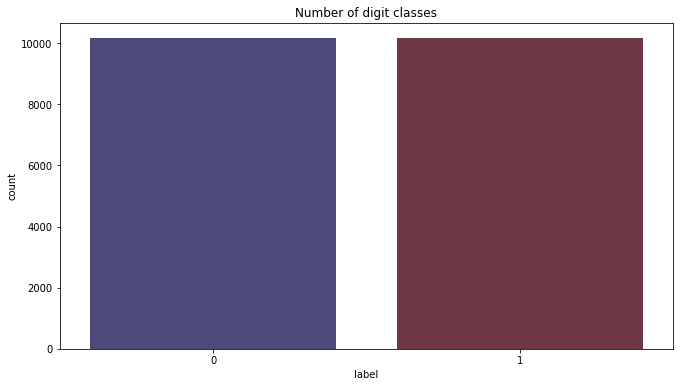

In [8]:
# visualize number of label classes

plt.figure(figsize=(11,6))
g = sns.countplot(dataset['label'], palette="icefire")
plt.title("Number of digit classes")
dataset_1['label'].value_counts()

## Split Train/Val/Test

In [9]:
# Shuffle
# shuffle dataset **once**, but reliably so that each run yields the same results

dataset_shuffle = shuffle(dataset_1, random_state=8)

dataset_shuffle

,ip_present,at_present,url_length,url_depth,redirection,https_domain,short_url,prefix/suffix,dns_record,web_traffic,domain_age,domain_end,dot_count,specialchar_count,subdom_count,label
10235,0,0,0,1,0,0,0,0,0,1,0,1,1,5,1,1
10671,0,0,0,1,0,0,0,0,0,0,0,1,0,6,0,1
19168,0,0,1,4,0,0,0,0,0,0,0,0,0,8,0,1
17891,0,0,1,4,0,0,0,0,0,1,1,0,1,7,1,1
11920,0,0,1,3,0,0,0,0,0,0,0,0,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,0,0,4,0,0,0,0,0,1,1,1,0,4,0,0
10376,0,0,0,0,0,0,0,0,0,1,1,1,0,3,1,1
2181,0,0,0,3,0,0,0,0,0,1,1,1,0,2,0,0
18417,0,0,0,0,0,0,1,0,1,1,1,1,0,4,1,1


In [10]:
# Separating & assigning features and target columns to X & y

y = dataset_1['label']
X = dataset_1.drop('label',axis=1)
X.shape, y.shape

((20328, 15), (20328,))

# Split Train/Val/Test

In [14]:
# Spliting the dataset into Training, Validation, and Test Set

#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16262, 15), (4066, 15), (16262,), (4066,))

In [15]:
# Converting target variables from dataframe to an array

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)


In [16]:
y_train, y_test

(array([0, 1, 0, ..., 0, 0, 1], dtype=int64),
 array([1, 1, 1, ..., 0, 1, 0], dtype=int64))

In [17]:
## Normalize data using StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:

## Displaying the dimensions present in the dataset

print("Dimensions of the original dataset :",X.shape[0], "rows and",X.shape[1],"columns\n")

print("Dimensions of the training dataset :",X_train.shape[0], "rows and",X_train.shape[1],"columns\n")

print("Dimensions of the testing dataset :",X_test.shape[0], "rows and",X_test.shape[1],"columns\n")

#print("Dimensions of the validation dataset :",X_val.shape[0], "rows and",X_val.shape[1],"columns\n")


Dimensions of the original dataset : 20328 rows and 15 columns

Dimensions of the training dataset : 16262 rows and 15 columns

Dimensions of the testing dataset : 4066 rows and 15 columns



## Machine Learning Models & Training

In [19]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
    ML_Model.append(model)
    acc_train.append("{:.2f}%" .format (a, 2))
    acc_test.append("{:.2f}%" .format (b, 2))

## Decision Tree

In [20]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier


# starting time
start_time = time.time()
start = time.perf_counter_ns()

print('\n')
print('Starting Decision Tree Model training.... \n')

##===================================##




# instantiate the model 
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)
# fit the model 
tree.fit(X_train, y_train)
# predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

#computing the accuracy of the model performance
acc_train_tree = (accuracy_score(y_train,y_train_tree)*100)
acc_test_tree = (accuracy_score(y_test,y_test_tree)*100)

print("Decision Tree: Accuracy on training Data:" ,(acc_train_tree))
print("Decision Tree: Accuracy on test Data: " ,(acc_test_tree))



##===================================##
print('\n\n\n\n')


#how much time a program to execute
print("Measure Execution Time Of Python Code --- \n")
elapsed = time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time))
print(f"Runtime: Decision Tree Model Training:  {elapsed}")


print("Runtime: Decision Tree Model Training: %s milliseconds" % (time.time() - start_time))


duration = time.perf_counter_ns() - start
print(f"Runtime: Decision Tree Model Training: {duration // 1000000}ms")

print('\n\n\n\n')
print("***Completed")



#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)



Starting Decision Tree Model training.... 

Decision Tree: Accuracy on training Data: 87.7198376583446
Decision Tree: Accuracy on test Data:  87.70290211510084





Measure Execution Time Of Python Code --- 

Runtime: Decision Tree Model Training:  00:00:00
Runtime: Decision Tree Model Training: 0.04770493507385254 milliseconds
Runtime: Decision Tree Model Training: 47ms





***Completed


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecation

## Random Forest

In [21]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier


# starting time
start_time = time.time()
start = time.perf_counter_ns()

print('\n')
print('Starting Random Forest Model training.... \n')

##===================================##

# instantiate the model
forest = RandomForestClassifier(max_depth=4, min_samples_leaf=4)
# fit the model 
forest.fit(X_train, y_train)
# predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

# computing the accuracy of the model performance
acc_train_forest = (accuracy_score(y_train,y_train_forest)*100)
acc_test_forest = (accuracy_score(y_test,y_test_forest)*100)

print("Random forest: Accuracy on training Data: " ,(acc_train_forest))
print("Random forest: Accuracy on test Data: " ,(acc_test_forest))


##===================================##
print('\n\n\n\n')


#how much time a program to execute
print("Measure Execution Time Of Python Code --- \n")
elapsed = time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time))
print(f"Runtime: Random Forest Model Training:  {elapsed}")


print("Runtime: Random Forest Model Training: %s milliseconds" % (time.time() - start_time))


duration = time.perf_counter_ns() - start
print(f"Runtime: Random Forest Model Training: {duration // 1000000}ms")

print('\n\n\n\n')
print("***Completed")



# storing the results. The below mentioned order of parameter passing is important.
# Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)



Starting Random Forest Model training.... 

Random forest: Accuracy on training Data:  88.35321608658222
Random forest: Accuracy on test Data:  88.58829316281359





Measure Execution Time Of Python Code --- 

Runtime: Random Forest Model Training:  00:00:00
Runtime: Random Forest Model Training: 0.16036224365234375 milliseconds
Runtime: Random Forest Model Training: 160ms





***Completed


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._grad

## CNN Model

In [22]:
#importing required packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv1D, MaxPool1D, Dropout, Input
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold

import time
from datetime import datetime

from keras.callbacks import TensorBoard


In [23]:


# Reshaping data as expected by Sequential model
# convert to 3 dim array

X_train_reshape = X_train.reshape(X_train.shape[0], X_train.shape[1],1)

X_test_reshape = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

print("3 dim array as expected by cnn model")
print("X_train:", X_train_reshape.shape)
print("X_test:", X_test_reshape.shape)



3 dim array as expected by cnn model
X_train: (16262, 15, 1)
X_test: (4066, 15, 1)


In [24]:
# CNN model

#importing required packages

import tensorflow as tf
import tensorflow.keras as k

from tensorflow.keras import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import GlobalMaxPooling1D, Activation, Dense, Flatten, Conv1D, MaxPooling1D, Dropout, BatchNormalization
from keras import regularizers

from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l1
from sklearn.model_selection import KFold
import random as rn

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [25]:
tf.random.set_random_seed(2)


# Model configuration
batch_size = 128
no_epochs = 60
optimizer = Adam(learning_rate=0.01)
verbosity = 2
l1 = regularizers.l1(0.001)

input_dim = X_train_reshape[0].shape

                                # Define the model architecture
#--Layer Name
proposed = Sequential(name="Proposed_Model")
    
#--Input Layer
proposed.add(Conv1D(40, 3, activation='relu', input_shape=input_dim , 
                    kernel_regularizer=l1))
proposed.add(BatchNormalization())

#--Convo Layer 1
proposed.add(Conv1D(14, 3, activation='relu', padding='same', name="CONV_1"))
proposed.add(MaxPool1D(2, name="POOLING_1"))
#--Convo Layer 2
proposed.add(Conv1D(20, 3, activation='relu', padding='same', name="CONV_2", kernel_regularizer=l1))
#--Convo Layer 3
proposed.add(Conv1D(26, 3, activation='relu', padding='same', name="CONV_3"))
#--Convo Layer 4
proposed.add(Conv1D(32, 3, activation='relu', padding='same', name="CONV_4"))
proposed.add(MaxPool1D(2, name="POOLING_2"))
proposed.add(Dropout(0.5, name="DROPOUT_1"))
    
##-----Fully Connected Layer
proposed.add(Flatten(name="FC"))
##--First Fully Connected Layer 5
proposed.add(Dense(64, activation='relu', name='DENSE_1', kernel_regularizer=l1))
proposed.add(Dropout(0.5, name="DROPOUT_2"))
    
##--Fully Connected Output Layer
proposed.add(Dense(2, activation='softmax', name="OUTPUT"))

# Compile the model
proposed.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer, metrics=['accuracy'])



Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
# Train the Model

# starting time
start_time = time.time()
start = time.perf_counter_ns()

print('\n')
print('Starting CNN Model training.... \n')

##===================================##


print('Building model... \n')

history = proposed.fit (X_train_reshape, y_train, validation_data=(X_test_reshape, y_test),
                    batch_size=128, epochs=80, verbose=2, shuffle = False)

# Score metrics from the model
print('')
score = proposed.evaluate(X_test_reshape, y_test, verbose=2)

# Displays the accuracy of correct sentiment prediction over test data
print('')
print("Test loss: %.2f%%" % score[0])
print("Test accuracy: %.2f%%" % (score[1]*100))

##===================================##
print('\n\n\n\n')


#how much time a program to execute
print("Measure Execution Time Of Python Code --- \n")
elapsed = time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time))
print(f"Runtime: CNN Model Training:  {elapsed}")


print("Runtime: CNN Model Training: %s milliseconds" % (time.time() - start_time))


duration = time.perf_counter_ns() - start
print(f"Runtime: CNN Model Training: {duration // 1000000}ms")

print('\n\n\n\n')
print("***Completed")


In [ ]:
proposed.summary()

In [ ]:

## Evaluate model scores

acc_train_cnn = (proposed.evaluate(X_train_reshape, y_train)[1]*100)
acc_test_cnn = (proposed.evaluate(X_test_reshape, y_test)[1]*100)

print("batch_size=128, epochs=80")
print('')
print("CNN: Accuracy on training Data: %.2f%%" % (acc_train_cnn))
print("CNN: Accuracy on TEST Data: %.2f%%" % (acc_test_cnn))


batch_size=128, epochs=80

CNN: Accuracy on training Data: 92.28%
CNN: Accuracy on TEST Data: 91.91%


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('CNN', acc_train_cnn, acc_test_cnn)

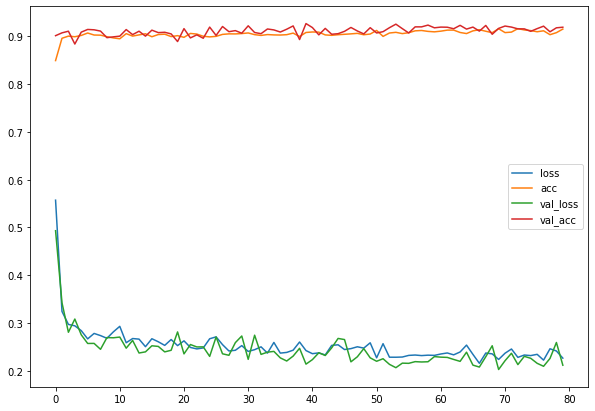

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.show()

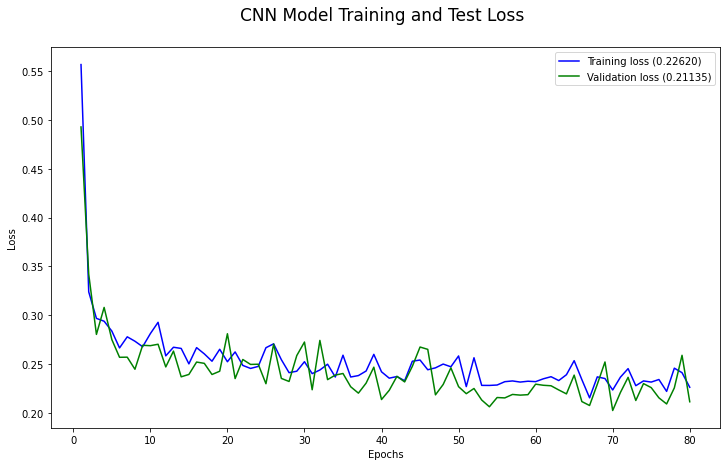

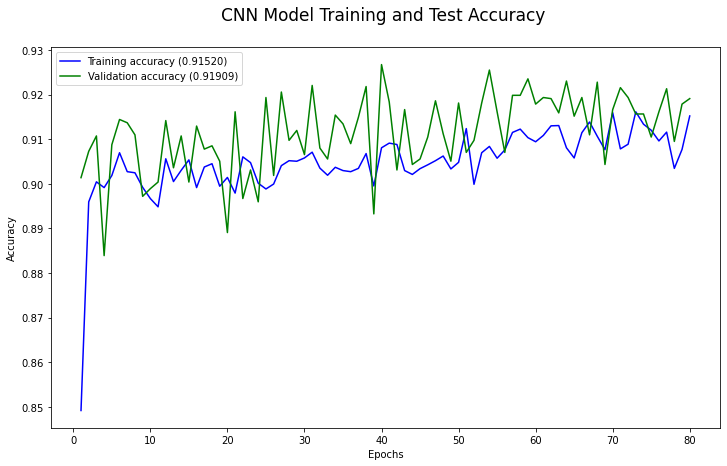

In [ ]:
## For Documentation

def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(figsize=(12,7))
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('CNN Model Training and Test Loss \n', fontsize=17)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    #plt.savefig('/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/train-loss-DOCU.png')

    
    print('\n \n')
    
    ## Accuracy
    plt.figure(figsize=(12,7))
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('CNN Model Training and Test Accuracy \n', fontsize=17)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    #plt.savefig('/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/train-acc-DOCU.png')
    plt.show()
    

#plot the graph
plot_history(history)

## Comparison of Models

In [ ]:
results = ({'ML Model':  ML_Model,    
    'Train Accuracy':   acc_train,
    'Test Accuracy':   acc_test})

# Create DataFrame  
df = pd.DataFrame(results)

# Set Index
index_df = df.set_index([pd.Index([1,2,3])])

# Set alignment
align_df = index_df.style.set_properties(**{'text-align': 'center'})

print("Dataset 3 Results - 50:50 dataset")
align_df

Dataset 3 Results - 50:50 dataset


,ML Model,Train Accuracy,Test Accuracy
1,Decision Tree,87.72%,87.70%
2,Random Forest,89.46%,89.77%
3,CNN,92.28%,91.91%


In [ ]:
#Sorting the dataframe on accuracy
index_df.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,CNN,92.28%,91.91%
2,Random Forest,89.46%,89.77%
1,Decision Tree,87.72%,87.70%


# CNN Prediction

In [ ]:
# Evaluating The Test Set
##To get predictions from the model for the test set, we call model.predict().


X_test = np.array(X_test_reshape)

predictions = proposed.predict(X_test_reshape, batch_size=10, verbose=0)  

# Predicting results for test dataset
pred_cnn = proposed.predict(X_test_reshape)

# Predicting results for tain dataset
train_cnn = proposed.predict(X_train_reshape)


# Since the predictions are floating point values, it will not be feasible to compare the predicted labels with true test labels
# Solution, round off the output which will convert the float values into an integer
# use np.argmax() to select the index number which has a higher value in a row


In [ ]:
predictions

array([[3.5344104e-07, 9.9999964e-01],
       [6.6260606e-02, 9.3373936e-01],
       [5.5674660e-01, 4.4325343e-01],
       ...,
       [1.0000000e+00, 0.0000000e+00],
       [6.0969466e-01, 3.9030534e-01],
       [1.0000000e+00, 2.5338751e-35]], dtype=float32)

In [ ]:
predictions = np.argmax(np.round(predictions),axis=1)
predictions

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
train_cnn = np.argmax(np.round(train_cnn),axis=1)

pred_cnn = np.argmax(np.round(pred_cnn),axis=1)


pred_cnn, train_cnn

(array([1, 1, 0, ..., 0, 0, 0]), array([0, 1, 0, ..., 0, 0, 1]))

In [ ]:

pred_cnn.shape, train_cnn.shape


((4066,), (16262,))

In [ ]:
# summarize the first 5 cases

for i in range(5):
    print('%s => %d (expected %d)' % (X_test_reshape[i].tolist(), predictions[i], y_test[i]))

[[0.0], [-0.15384615384615383], [-0.8519256735681326], [-0.8089488025095456], [-0.08512828932037698], [0.0], [3.0074028490097966], [-0.38138335670850676], [-0.19775093251336176], [0.544613085165869], [-1.608315401170647], [0.35729686516655346], [-0.5869604160171813], [-0.09463146884754256], [-0.8487051512302393]] => 1 (expected 1)
[[0.0], [-0.15384615384615383], [-0.8519256735681326], [-0.8089488025095456], [-0.08512828932037698], [0.0], [-0.33251281926837817], [-0.38138335670850676], [-0.19775093251336176], [0.544613085165869], [0.621768590459389], [0.35729686516655346], [-0.5869604160171813], [-0.2968784062110249], [1.1782655007459908]] => 1 (expected 1)
[[0.0], [-0.15384615384615383], [1.1738113206656695], [-0.26682709203356153], [-0.08512828932037698], [0.0], [3.0074028490097966], [-0.38138335670850676], [-0.19775093251336176], [0.544613085165869], [0.621768590459389], [0.35729686516655346], [-0.5869604160171813], [-0.09463146884754256], [1.1782655007459908]] => 0 (expected 1)
[[0.

In [ ]:
##  y_pred and y_test compare

print('Predictions: ', predictions[:10])

print( 'Actual:      ', y_test[:10])

Predictions:  [1 1 0 1 1 0 1 0 0 0]
Actual:       [1 1 1 1 1 0 1 0 0 0]


# CNN Visualization

In [ ]:
## Classification Report - complete
## Predict the values from the test set

print('Performance Evaluation of CNN on Test Data')
print('')

print("CNN: Accuracy on TEST Data: %.2f%%" % (acc_test_cnn))


print('')
print('CNN Confusion Matrix:')
print(confusion_matrix(y_test, pred_cnn))

print('')
print('CNN Classification Report: \n')
print(classification_report(y_test, pred_cnn))

print('')
score = proposed.evaluate(X_test, y_test, verbose=1)
print('Score Results: Loss, Accuracy',score)

Performance Evaluation of CNN on Test Data

CNN: Accuracy on TEST Data: 91.91%

CNN Confusion Matrix:
[[1947  104]
 [ 225 1790]]

CNN Classification Report: 

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2051
           1       0.95      0.89      0.92      2015

    accuracy                           0.92      4066
   macro avg       0.92      0.92      0.92      4066
weighted avg       0.92      0.92      0.92      4066


Score Results: Loss, Accuracy [0.2113527058382311, 0.9190851]


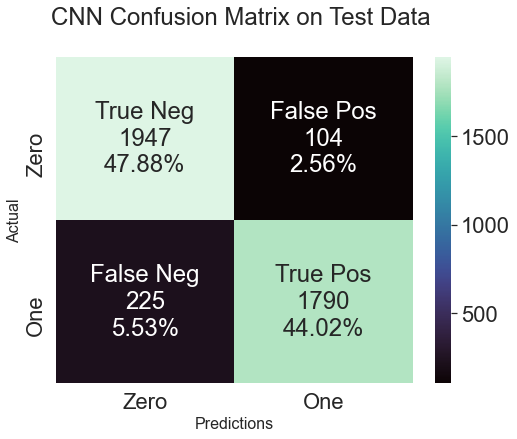

In [ ]:
## For Documentation

##Get the confusion matrix
cnn_matrix_test = confusion_matrix(y_test, pred_cnn)
sns.set(font_scale=2)
print('')

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='mako',
                          title='   CNN Confusion Matrix on Test Data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions', fontsize=16) #Predicted label
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cnn_matrix_test, 
                      group_names=labels,
                      categories=categories, 
                      cmap='mako', figsize=(8,6))

#plt.savefig("/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/cm-cnn-test-DOCU.png", bbox_inches='tight', pad_inches=0)


In [ ]:
## Classification Report - complete
## Predict the values from the Training set

print('Performance Evaluation of CNN on Training Data')
print('')

print("CNN: Accuracy on Training Data: %.2f%%" % (acc_train_cnn))

print('')
print('CNN Confusion Matrix:')
print(confusion_matrix(y_train, train_cnn))

print('')
print('CNN Classification Report: \n')
print(classification_report(y_train, train_cnn))

print('')
score = proposed.evaluate(X_train_reshape, train_cnn, verbose=1)
print('Score Results: Loss, Accuracy',score)


Performance Evaluation of CNN on Training Data

CNN: Accuracy on Training Data: 92.28%

CNN Confusion Matrix:
[[7699  414]
 [ 841 7308]]

CNN Classification Report: 

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      8113
           1       0.95      0.90      0.92      8149

    accuracy                           0.92     16262
   macro avg       0.92      0.92      0.92     16262
weighted avg       0.92      0.92      0.92     16262


Score Results: Loss, Accuracy [0.15967457689772804, 1.0]


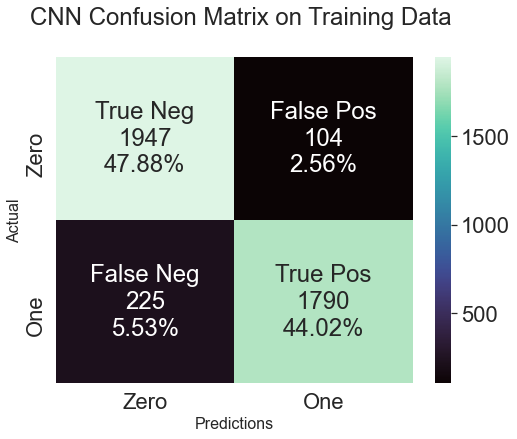

In [ ]:
## For Documentation

##Get the confusion matrix
cnn_matrix_train = confusion_matrix(y_train, train_cnn)
sns.set(font_scale=2)
print('')

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='mako',
                          title='   CNN Confusion Matrix on Training Data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions', fontsize=16) #Predicted label
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cnn_matrix_test, 
                      group_names=labels,
                      categories=categories)

#plt.savefig("/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/cm-cnn-train-DOCU.png", bbox_inches='tight', pad_inches=0)


# CNN Predictions

In [ ]:
## Compare actual and expected values

## The complete example below makes predictions for each example in the dataset, then prints the input data, predicted class and expected class for the first 5 examples in the dataset.
# make class predictions with the model
#predict = proposed.predict_classes(X_test)
# summarize the first 5 cases

m=0
for i in range(len(X_test_reshape)):
    if pred_cnn[i]==1:
        m=m+1
    print('Predicted %d---> Expected %d' % (pred_cnn[i], y_test[i]))
    

Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
P

Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
P

Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 1
P

In [ ]:
results = ({'ML Model':  ML_Model,    
    'Train Accuracy':   acc_train,
    'Test Accuracy':   acc_test})

# Create DataFrame  
df = pd.DataFrame(results)

# Set Index
index_df = df.set_index([pd.Index([1,2,3])])

# Set alignment
align_df = index_df.style.set_properties(**{'text-align': 'center'})

print("Dataset 3 Results")
align_df

Dataset 3 Results


,ML Model,Train Accuracy,Test Accuracy
1,Decision Tree,87.72%,87.70%
2,Random Forest,89.46%,89.77%
3,CNN,92.28%,91.91%
